### **Table of Content:**
1. Transfer Learning
2. Word2Vec (Google)
3. Support Ticket Classification using Word2Vec

#### **Transfer Learning:**

Basically a shortcut in Machine Learning where someone doesn't necessarily need to train a model from scratch, instead we can use simple use someone else's model that has already been trained on a massive dataset for our own problem.

- Useful in NLP as training on huge amount of text takes a lot of time and computing power.
- We can simply use pre-trained models like **Word2Vec** or **GloVe** which already know how words relate to each other and be used to process billions of sentences to create good representations.
- **For example**, if I want to classify text (like identifying whether a support ticket is urgent or not), I need to convert words into numbers. Normally, this would require running algorithms like TF-IDF or training my own embeddings, which can be slow for large datasets. But with pre-trained word vectors, I get ready-made word representations that I can directly plug into my model.
- So, instead of reinventing the wheel, I just "transfer" the learning from these models into my own project. This makes things way faster and often leads to better results since the pre-trained models have already captured complex word relationships from massive datasets.

#### **Word2Vec:**

- Combination of two techniques: 
    - **CBOW (Continuous Bag of Words)**
    - **Skip-gram model**

- Both of these are shallow neural networks that map word(s) to the target variable which is also a word(s).
- Both of these techniques learn weights of the neural network which acts as word vector representations.
- Basically each word is represented as a vector of numbers.

<html><image src="https://thinkingneuron.com/wp-content/uploads/2021/12/image-72.png" alt="Sample word2Vec vectors"></html>

### **CBOW**:
- Continuous Bag of Words
- Predicts the possibility of a word to occur given the words surrounding it, we can consider a single word or a group of words.

### **Skip-gram model**:
- Tries to achieve the reverse of CBOW model
- Tries to predict the source context words (surrounding words) given a target word (the center word)

Note:
- For a larger corpus with higher dimensions, better to use `skip-grams` but it's a bit slow to train.
- For a smaller corupus and faster training, use `CBOW`.

<html><image src="https://thinkingneuron.com/wp-content/uploads/2021/12/image-55.png" alt="CBOW vs Skip-Gram"></html>

**Word2Vec:** 
- Word2Vec Vectors: A form of word representations that bridges the human understanding of language to that of a machine.
- They have learned representation of text in an n-dimensional space where words having the same meaning have a similar representation.
    - Meaning that two similar words are represented by almost similar vectors (set of numbers) that are very close placed in a vector space. 

<html><image src="https://thinkingneuron.com/wp-content/uploads/2021/12/image-31.png" alt="Word2Vec"></html>

In the example, King and Queen are placed close to each other, similarly the words Man and Woman appear closer to each other due to the kind of numeric vectors assigned to these words by Word2Vec.

- While computing the distance between two words using their numeric vectors, then those words whichs are related to each other with a context will have less distance between them,

**Objective:**
Using numeric representations of words from Word2Vec and create a classification using `Support Ticket Classification Dataset`.

**Problem Statement:**
Using Microsoft support ticket text description to classify a new ticker into P1/P2/P3.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Reading the data
TicketData=pd.read_csv('../Datasets/supportTicketData.csv')

# Shape of TicketData
print(TicketData.shape)

# Printing sample rows
TicketData.head(10)

(19796, 2)


,body,urgency
0,connection issues with assigned address hi fac...,P1
1,cannot access hi cannot access fallowing link ...,P2
2,re address shown valid dear colleagues remarke...,P1
3,sent tuesday critical alert following alert oc...,P2
4,code spelling mistake hello should discover fo...,P2
5,annual leave hello sent last week about previo...,P2
6,report working hello dear last two weeks have ...,P2
7,more access lost access please reset password ...,P1
8,open credentials required please assist instal...,P1
9,dear please ask our supplier for price quotati...,P2


### Visualising the distribution of the Target variable

- Checking the priority types and checking the balance of distribution as there are enough rows in the dataset.

urgency
P1    6748
P2    5528
P3    7520
dtype: int64


<Axes: xlabel='urgency'>

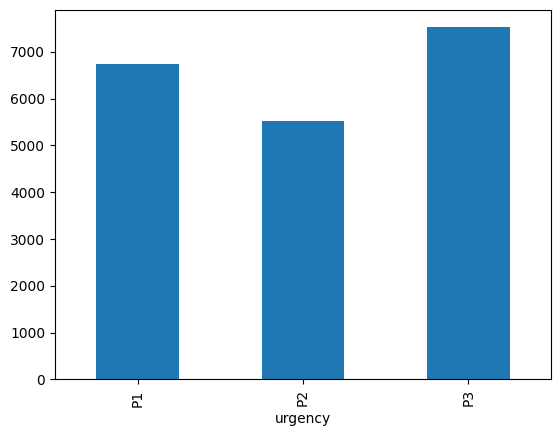

In [2]:
# Number of unique values for urgency column
print(TicketData.groupby('urgency').size())

# Plotting the bar chart
%matplotlib inline
TicketData.groupby('urgency').size().plot(kind='bar')

The above bar plot shows that there are enough rows for each ticket type. Hence, this is balanced data for classification.

### Count Vectorization: converting text data to numeric

- Removal of all the stopwords and creating a document term matrix
- Using to furthur processing, for each word in the document term matrix, using the Word2Vec numeric vector representation.

In [3]:
# Count vectorization of text
from sklearn.feature_extraction.text import CountVectorizer

# Ticket Data
corpus=TicketData['body'].values

# Creating the vectorizer
vectorizer=CountVectorizer(stop_words='english')

# Converting the text to numeric data
X=vectorizer.fit_transform(corpus)

# print(vectorizer.get_feature_names_out())

# Preparing data for Machine Learning
# Target Variable -> Priority column
# Other columns -> predictors
CountVectorizedData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
CountVectorizedData['Priority']=TicketData['urgency']
print(CountVectorizedData.shape)
CountVectorizedData.head()

(19796, 9100)


,ab,abandon,abandoned,abc,abeam,abilities,ability,able,abnormal,abnormally,...,zig,zip,zipped,zipper,zipping,zone,zones,zoom,zooming,Priority
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,P1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,P2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,P1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,P2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,P2


### **Word2Vec conversion:**

- Word2Vec representation of words is used to convert document term matrix to a smaller matrix, where columns are the sum of the vectors for each word present in the document.

<html><image src="https://thinkingneuron.com/wp-content/uploads/2021/12/image-74.png" alt="Word2Vec vector representation"></html>

Above diagram represents flow for one sentence, same happens for every sentence in a corpus.

Procedure:
- The numeric representation of each word is taken from Word2Vec
- All the vectors are added, hence producing a single vector
- The single vector represents the information of the sentence, hence treated as one row.

### **Downloading Google’s word2Vec model**
- Using the Pre-trained word2Vec model from google, It contains word vectors for a vocabulary of 3 million words.
- Trained on around 100 billion words from the google news dataset.
Download link: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

This contains a binary file, that contains numeric representations for each word.

In [4]:
# Installing the gensim library required for word2Vec and Doc2Vec
!pip install gensim gdown


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# import os
# import gensim
# import gdown

# # Google Drive file ID (Replace with the correct ID from Step 2)
# file_id = "1XkSHdm1PswX0CJcAs7pxb2uUlJQ6TjZl"
# file_url = f"https://drive.google.com/uc?id={file_id}"

# # Destination file path
# destination = "GoogleNews-vectors-negative300.bin"

# # Check if the file already exists
# if not os.path.exists(destination):
#     print("Downloading Google News Word2Vec model from Google Drive...")
#     try:
#         gdown.download(file_url, destination, quiet=False)
#         print("Download complete.")
#     except Exception as e:
#         print(f"Download failed: {e}")
#         print("Try manually downloading the file and placing it in the script folder.")
# else:
#     print("File already exists. Skipping download.")

# # Load the pre-trained Word2Vec model
# print("Loading the Word2Vec model...")
# GoogleModel = gensim.models.KeyedVectors.load_word2vec_format(destination, binary=True)
# print("Model loaded successfully!")

# # Test: Get similar words for a sample word
# print(GoogleModel.most_similar("king"))

Download failed: Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1XkSHdm1PswX0CJcAs7pxb2uUlJQ6TjZl

but Gdown can't. Please check connections and permissions.
Try manually downloading the file and placing it in the script folder.
Loading the Word2Vec model...


FileNotFoundError: [Errno 2] No such file or directory: 'GoogleNews-vectors-negative300.bin'

In [7]:
import os

file_path = r"C:\Users\Dell\Downloads\GoogleNews-vectors-negative300.bin"

# Check if file exists and is readable
if os.path.exists(file_path):
    print("✅ File exists!")
    if os.access(file_path, os.R_OK):
        print("✅ File is readable!")
    else:
        print("❌ Permission issue: File exists but is not readable.")
else:
    print("❌ File does not exist. Check the path again.")

✅ File exists!
✅ File is readable!


In [8]:
try:
    with open(file_path, "rb") as f:
        print("✅ File opened successfully!")
except PermissionError:
    print("❌ Permission denied. Try running Python as Administrator.")
except Exception as e:
    print(f"❌ Error: {e}")

❌ Permission denied. Try running Python as Administrator.
